<a href="https://colab.research.google.com/github/Gagancoder/-F-R-D-DDY-/blob/main/Class_118_Clustring_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`ABOUT CLUSTRING`***

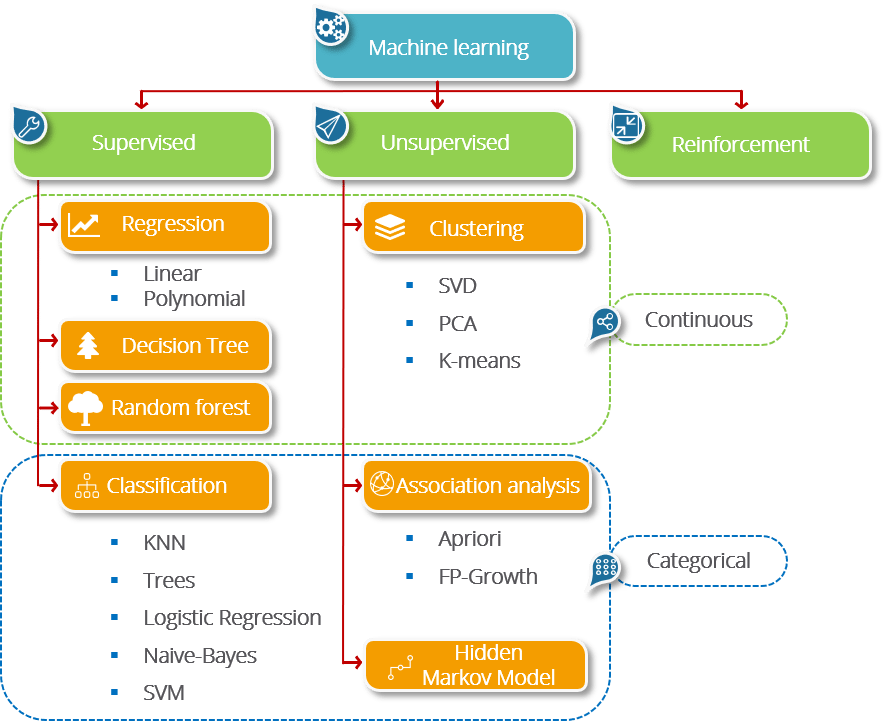

https://www.guru99.com/unsupervised-machine-learning.html#:~:text=Unsupervised%20Learning%20is%20a%20machine,deals%20with%20the%20unlabelled%20data.

# ***`What Is Clustring ?`***

# C118 Clustering


C118: https://obj.whitehatjr.com/66e9e085-c552-4b64-8369-580536da84fc.pdf


\
When you look for things such as music, you might want to look for meaningful groups. It could be from a particular artist, a particular genre, a particular language or a particular decade. How you group items gives you more insights about it.

\
You might find you have a strong linking for vintage music, or something upbeat.

\
In machine learning, we can often group examples to understand more about the data. Grouping unlabelled examples is called clustering.

\
For example, let's say that you have a dataset of flowers, with different petal and sepal size but you want to identify what kind of a flower are they. For this, you can group the blobs in the scatter plot and then based on the attributes of the cluster, you can identify what flower it is.

\
One of the most widely used algorithms for clustering is the K-means algorithm.

\
![alt text](https://drive.google.com/uc?export=view&id=16nTiBIOiu0vFdYTpffhdML_9idPun8Wd)


\
# Applications of clustering

\
It has a wide use of activities. Based on the example above, it can be used in the field of biology to differentiate species from each other, or it can be used to identify different images / audio. It can also be used to group behaviours, or detecting abnormal behaviour.

\
# How does it work?

\
We are going to study the K-means algorithm. The first step to perform here is to decide the number of clusters. The `K` signifies the number of clusters that the algorithm would find in the dataset.

\
Choosing the right K is very important. Sometimes, it is clearly visible from the dataset when it is visualised, however, most of the time, this is not the case.

\
## Steps to perform the K-means Algorithm -

\
###Step 1
Choose the number K of clusters

###Step 2
Select randomly the center points (`centroids`) for the K clusters (2 in this case)
\
![alt text](https://drive.google.com/uc?export=view&id=1Ki8gF0PZ-tQLrLmXnWHsPa7T3eLH7VkU)

###Step 3
Assign each data point to the closest centroid
\
![alt text](https://drive.google.com/uc?export=view&id=1n8DXXA_-VJdaY56lvBKnRmh1q8ud4s9V)

###Step 4
Shift the centroids a little for all the clusters
\
![alt text](https://drive.google.com/uc?export=view&id=10C8WJ0EdBMCiD5Qka0-Gn3rOho38s3xz)

###Step 5
Re-assign each data point to the new closest centroid. If any points got reassigned, repeat `Step 4` again otherwise the model is ready.
\
![alt text](https://drive.google.com/uc?export=view&id=14m8LCTZcw2xUZ6CnI54xrhWfbJ_DROa5)

##Summary
\
![alt text](https://drive.google.com/uc?export=view&id=13mSOR4-Z4y_4lTaW1zBwDlqGKxhdNh8x)

# How to choose the right K?

\
We use the `WCSS` perimeter to to evaluate the choice of K. `WCSS` stands for `Within Cluster Sum of Squares`. What this means is that we are going to choose a center point for a cluster, from where all the points falling inside that cluster will be closest.

Then, we will calculate the distance of all the points from the center, add up all the distances and then note the value.

We will then take 2 centre points and do the same. We will choose the value of K to be the one which has the minimum sum of all the distances.

\
The `Elbow method` can be used to choose the best value for K. Let's see how it works!

\
Here, we are going to take up a data of some of the flowers, and we want to cluster them to know how many species of flower's data do we have.

# ***`IMPORTING CSV`***

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving stars.csv to stars.csv


# ***`Imporing's`***

In [9]:
import pandas as pd
import csv
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ***`Getting the DataFrame`***

In [6]:
df = pd.read_csv("stars.csv")
print(df.head())


        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


# ***`Making a Scatter Plot`***

In [17]:

fig = px.scatter(df, x="Size", y="Light", color="Size")
fig.show()

Now, let's find the best K value by using the `WCSS` perimeter and the `Elbow method`.

# **`Data`**
Here, we are first using the iloc[ ]
method to get the list. Inside the [ ] of
the iloc method, we are saying that
we want all the values (:) in the form
of a list ([0, 1]) containing the 0th and
the first elements of the rows.

In [18]:
df

,Size,Light
0,5.882677,1.325411
1,10.912830,3.183217
2,0.281190,0.620011
3,7.682623,1.804578
4,11.034071,3.390440
...,...,...
145,11.215165,4.828228
146,0.081555,0.904242
147,6.879421,0.269391
148,12.939503,2.365076


# **`Getting the X value`**

In [19]:
X = df.iloc[:, [0, 1]].values

print(X)

[[ 5.88267711  1.32541075]
 [10.91282974  3.18321731]
 [ 0.28118987  0.62001076]
 [ 7.68262274  1.80457756]
 [11.03407102  3.39044009]
 [ 0.84988347  0.82656157]
 [ 6.47346749  0.99997187]
 [12.17993641  4.37695642]
 [ 0.18253329  0.24372793]
 [ 7.56820956  1.31053068]
 [12.69679005  2.03584376]
 [ 0.02770377  0.64390611]
 [ 5.20021714  1.90392855]
 [14.84844867  9.20677086]
 [ 0.25906822  0.78305536]
 [ 6.1243438   1.1005551 ]
 [10.06301215  6.8423572 ]
 [ 0.50675639  0.74370214]
 [ 6.28221831  0.16934718]
 [14.025183    7.43555359]
 [ 0.05434116  0.19156329]
 [ 6.27626654  0.33758452]
 [10.31157448  9.41636235]
 [ 0.99958727  0.29189379]
 [ 5.22916552  0.02493252]
 [12.77452289  3.35990116]
 [ 0.99287173  0.27721941]
 [ 6.78203126  0.23741951]
 [12.73355738  4.98628931]
 [ 0.14092131  0.44453679]
 [ 5.08774426  0.3371882 ]
 [14.78157283  3.02636823]
 [ 0.20758125  0.40063895]
 [ 5.77421644  1.01817787]
 [14.42188085  5.06561331]
 [ 0.61217792  0.754544  ]
 [ 7.84657616  0.81794734]
 


We are then creating an empty list to
store our WCSS values.
Finally, since there are usually less
than 10 clusters for most of the cases,
we are iterating in the range(1, 11)
and we are using the KMeans()
classifier. In the classifier, we are
passing the number of clusters we
want to use for the classifier (i), the
initialisation method (k-means++
since it is one of the best algorithms
to find the kmeans value) and a
random state (required tell the
classifier where it should start from. It
helps in saving time).
Once our classifier is ready, we are
fitting our list of lists we created and
finding the inertia of the classifier
(which is also the WCSS) value and
appending this value into our empty
list.

random_state has value 42 because
we need to start with some random
value. It can be any value.

# ***`Here the range is taken till 11 because we just need 10 cluster points.`***

In [20]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)

    
# inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# ***`Getting the WCSS of Data`***

In [21]:
wcss

[4647.672578846854,
 1335.0747019360508,
 445.441990087426,
 245.80054062256528,
 195.07057105524243,
 151.1850931078844,
 122.87564387823424,
 100.49635506435902,
 87.46779735934152,
 77.4999926351009]

# **`Now let's plot the data in a normal line plot`**


Here, are using the pyplot and the
seaborn libraries to create a chart for
k-means.
We are first specifying the size of our
chart (10 units in width and 5 units in
height).
We are then using the sns to create a
lineplot (from 1, 11 since it was our
range) and we are passing our list of
wcss values we created earlier. We
are also specifying the marker to be
“o” or a dot and the color of the line
(red).
We are finally adding the titles and
the labels and displaying the chart.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



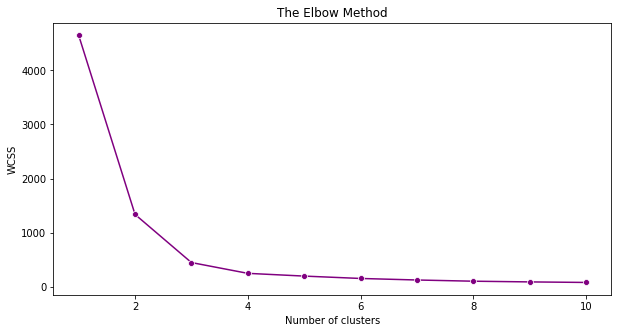

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# ***`Now, if we look at the scatterplot we plotted earlier, we can see that their might be around 3 clusters.`***

\
In the `elbow` chart above, we can see that the WCSS value is decreasing significantly until the `K = 3`. Hence, we can see that our `K` is `3` for the data given.

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Printing the Y `KMeans`

In [33]:
y_kmeans

array([2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0], dtype=int32)

`y_kmeans` is now a list of values
containing 0, 1 and 2. This value is
based on the cluster where the
corresponding element in X should
be.


What we can do next is that we can
separate out all the data-points for
cluster 0, cluster 1 and cluster 2 and
plot these points in different colors.
# ***`Now let's plot these cluster points on the scatter plot`***


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

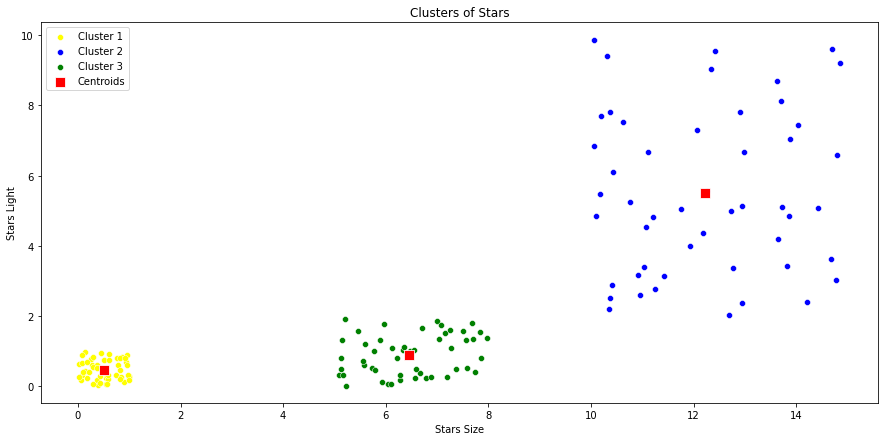

In [36]:
#here we are going to create a scatter plot with the groups and different colors of center points for each group.
plt.figure(figsize=(15,7)) #Here, we are first specifying the size of the plot.
#We are then creating 3 scatterplots.

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1')
#Here, the first thing that we are doing is that we are taking the 0th element from X (X contains petal and sepal sizes (2 elements)) 
#based on if this pair of petal and sepal sizes belongs to the 0th cluster (conditioned as y_means == 0). 
#Similarly, we are taking the 1st element as well. We are then giving it color “Yellow” and labeling it as “Cluster 1”

sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2')

sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3')

#We are then creating the centroids of these clusters with -
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker=',')

#Here, we are first passing the center values for all the clusters with kmeans.cluster_centers_[:, 0] where it will take all the 0th elements 
#from the entire list of cluser_centers_ for the X-Coordinate and repeating the same to take all the 1st elements from the entire list (Y-Coordinate)
#We are then coloring the centroids as red, giving them a label, sizing them as 100 (so they appear a bit bigger) and giving them a marker.

plt.grid(False) ## Hide grid lines
plt.title('Clusters of Stars')
plt.xlabel('Stars Size')
plt.ylabel('Stars Light')
plt.legend() # Function add a legend  
plt.show()




Thus, we can see that our model has identified 3 clusters, which means that we had data for 3 different species of flowers.